# MNIST Handwritten Digit Classifier - Classify the Odd/Even Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify whether the digit is an odd number or an even number.

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
image_height,image_width = 28, 28

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
y_train = y_train % 2
y_test = y_test % 2

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [6]:
model = Sequential()

In [7]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 665,089
Trainable params: 665,089
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0896 - accuracy: 0.9678 - val_loss: 0.0549 - val_accuracy: 0.9821
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0450 - accuracy: 0.9848 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0191 - accuracy: 0.9932 - val_loss: 0.0580 - val_accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0430 - val_ac

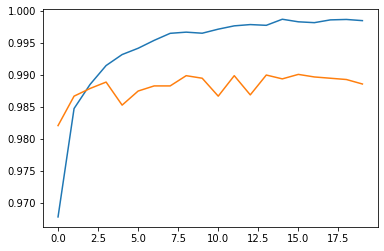

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

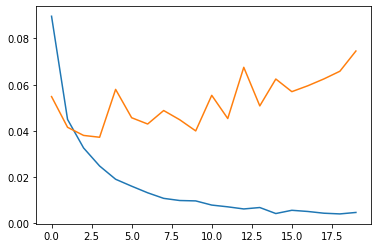

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [13]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9886


[0.07457059621810913, 0.9886000156402588]